# Modelo predictivo de problemas cardiacos

### Definición del Problema

<p style="text-align: justify;"> Este proyecto tiene como propósito ser una herramienta para desarrollar un modelo predictivo que apoye a la toma de decisiones que ayuden a mejorar la detección temprana y el manejo de enfermedades cardíacas basandonos en la observación de pacientes de distintas edades de un data set. Esto potencialmente puede salvar vidas y mejorar la calidad de vida de futuros pacientes.</p>

<p style="text-align: justify;">Al predecir la presencia de enfermedades cardíacas y comprender los factores de riesgo de casos pasados, los profesionales de la salud pueden intervenir de manera más efectiva para prevenir, detectar y tratar un posible riesgo cardiaco, lo que potencialmente puede salvar vidas y mejorar la calidad de vida de las personas afectadas.</p>

### Recolección y Preparación de Datos

La base de datos viene de Kaggle

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Librerias

In [557]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

### Base de datos

<p style="text-align: justify;">Los datos vienen de cuatro datasets de países distintos los cuales son Cleveland, Hungría, Suiza y Long Beach V, a esta base de datos se accede mediante la función "read csv" para crear un DataFrame de dichos datos.

In [471]:
data = "../data/raw/heart 2.csv"
df = pd.read_csv(data)

In [472]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [473]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [474]:
df.shape

(1025, 14)

### Features

Este DataFrame cuenta con 1025 filas las cuales representan a distintos pacientes y 14 columnas las cuales representan 14 diferentes "features" de dichos pacientes, las cuales son:

- Edad

- Sexo

- Tipo de dolor en el pecho (4 valores):
    - Valor 0: Angina típica
    - Valor 1: Angina atípica
    - Valor 2: Sin dolor de angina
    - Valor 3: Asintomático

- Presión arterial en reposo medido en  milímetros de mercurio al ingresar al hospital

- Colesterol sérico en mg/dl

- Azúcar en sangre en ayunas > 120 mg/dl:
    - Valor 0: Falso
    - Valor 1: Verdadero

- Resultados electrocardiográficos en reposo:
    - Valor 0: Normal
    - Valor 1: Poseer anomalía de la onda ST-T
    - Valor 2: Poseer hipertrofia ventricular izquierda probable o definitiva

- Frecuencia cardíaca máxima alcanzada

- Angina inducida por ejercicio:
    - Valor 0: Falso
    - Valor 1: Verdadero

- Depresión del segmento ST inducida por ejercicio en relación al reposo

- La pendiente del segmento ST del ejercicio máximo:
    - Valor 0: Pendiente ascendente
    - Valor 1: Pendiente plana
    - Valor 2: Pendiente descendente

- Número de vasos principales (0-3) coloreados por fluoroscopia

- Thal: 
    - Valor 0: Normal
    - Valor 1: Defecto fijo
    - Valor 2: Defecto reversible

- Target:
    - Valor 0: Menor riesgo de ataque al corazón
    - Valor 1: Mayor riesgo de ataque al corazón

### Datos faltantes

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [476]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Análisis Exploratorio de Datos (EDA)

**Edad**

In [477]:
print('Su mediana es', df['age'].median())
print('Su moda es', df['age'].mode()[0])
print('Su curtosis es de', df['age'].kurt())
print('Su sesgo es de', df['age'].skew())
print(df['age'].describe())

Su mediana es 56.0
Su moda es 58
Su curtosis es de -0.5256178128684339
Su sesgo es de -0.24886590174584555
count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64


**Cantidad de arterias principales**

In [478]:
print('Su mediana es', df['ca'].median())
print('Su moda es', df['ca'].mode()[0])
print('Su curtosis es de', df['ca'].kurt())
print('Su sesgo es de', df['ca'].skew())
print(df['ca'].describe())

Su mediana es 0.0
Su moda es 0
Su curtosis es de 0.7011228657727422
Su sesgo es de 1.2611886429097716
count    1025.000000
mean        0.754146
std         1.030798
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: ca, dtype: float64


**Colesterol sérico**

In [479]:
print('Su mediana es', df['chol'].median())
print('Su moda es', df['chol'].mode()[0])
print('Su curtosis es de', df['chol'].kurt())
print('Su sesgo es de', df['chol'].skew())
print(df['chol'].describe())

Su mediana es 240.0
Su moda es 204
Su curtosis es de 3.9968030492724647
Su sesgo es de 1.0740727783354815
count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64


**Dolor de pecho (0-3)**

In [480]:
print('Su mediana es', df['cp'].median())
print('Su moda es', df['cp'].mode()[0])
print('Su curtosis es de', df['cp'].kurt())
print('Su sesgo es de', df['cp'].skew())
print(df['cp'].describe())

Su mediana es 1.0
Su moda es 0
Su curtosis es de -1.1494995222913056
Su sesgo es de 0.5294552058584099
count    1025.000000
mean        0.942439
std         1.029641
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: cp, dtype: float64


**Frecuencia cardíaca máxima alcanzada**

In [481]:
print('Su mediana es', df['exang'].median())
print('Su moda es', df['exang'].mode()[0])
print('Su curtosis es de', df['exang'].kurt())
print('Su sesgo es de', df['exang'].skew())
print(df['exang'].describe())

Su mediana es 0.0
Su moda es 0
Su curtosis es de -1.5232047382747014
Su sesgo es de 0.692655170469321
count    1025.000000
mean        0.336585
std         0.472772
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: exang, dtype: float64


**Azúcar en sangre en ayunas > 120 mg/dl**

In [482]:
print('Su mediana es', df['fbs'].median())
print('Su moda es', df['fbs'].mode()[0])
print('Su curtosis es de', df['fbs'].kurt())
print('Su sesgo es de', df['fbs'].skew())
print(df['fbs'].describe())

Su mediana es 0.0
Su moda es 0
Su curtosis es de 1.8898593171743996
Su sesgo es de 1.9713385276901942
count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64


**Depresión del ST inducida por el ejercicio en relación con el reposo**

In [483]:
print('Su mediana es', df['oldpeak'].median())
print('Su moda es', df['oldpeak'].mode()[0])
print('Su curtosis es de', df['oldpeak'].kurt())
print('Su sesgo es de', df['oldpeak'].skew())
print(df['oldpeak'].describe())

Su mediana es 0.8
Su moda es 0.0
Su curtosis es de 1.3144708893202801
Su sesgo es de 1.2108993882065326
count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64


**resultados electrocardiográficos en reposo (valores 0,1,2)**

In [484]:
print('Su mediana es', df['restecg'].median())
print('Su moda es', df['restecg'].mode()[0])
print('Su curtosis es de', df['restecg'].kurt())
print('Su sesgo es de', df['restecg'].skew())
print(df['restecg'].describe())

Su mediana es 1.0
Su moda es 1
Su curtosis es de -1.3096135146492
Su sesgo es de 0.18044041112923528
count    1025.000000
mean        0.529756
std         0.527878
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: restecg, dtype: float64


**Angina inducida por el ejercicio**

In [485]:
print('Su mediana es', df['exang'].median())
print('Su moda es', df['exang'].mode()[0])
print('Su curtosis es de', df['exang'].kurt())
print('Su sesgo es de', df['exang'].skew())
print(df['exang'].describe())

Su mediana es 0.0
Su moda es 0
Su curtosis es de -1.5232047382747014
Su sesgo es de 0.692655170469321
count    1025.000000
mean        0.336585
std         0.472772
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: exang, dtype: float64


**Sexo**

In [486]:
print("0 equivale a mujer y 1 a hombre")
print('Su mediana es', df['sex'].median())
print('Su moda es', df['sex'].mode()[0])
print('Su curtosis es de', df['sex'].kurt())
print('Su sesgo es de', df['sex'].skew())
print(df['sex'].describe())

0 equivale a mujer y 1 a hombre
Su mediana es 1.0
Su moda es 1
Su curtosis es de -1.2775313330187505
Su sesgo es de -0.8514488985126767
count    1025.000000
mean        0.695610
std         0.460373
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64


**Pendiente del segmento ST del ejercicio máximo**

In [487]:
print('Su mediana es', df['slope'].median())
print('Su moda es', df['slope'].mode()[0])
print('Su curtosis es de', df['slope'].kurt())
print('Su sesgo es de', df['slope'].skew())
print(df['slope'].describe())

Su mediana es 1.0
Su moda es 1
Su curtosis es de -0.6471291959211065
Su sesgo es de -0.4791344197425813
count    1025.000000
mean        1.385366
std         0.617755
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: slope, dtype: float64


**Thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible**

In [488]:
print('Su mediana es', df['thal'].median())
print('Su moda es', df['thal'].mode()[0])
print('Su curtosis es de', df['thal'].kurt())
print('Su sesgo es de', df['thal'].skew())
print(df['thal'].describe())

Su mediana es 2.0
Su moda es 2
Su curtosis es de 0.25082653446427816
Su sesgo es de -0.5243897710407986
count    1025.000000
mean        2.323902
std         0.620660
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: thal, dtype: float64


In [489]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Gráficas

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

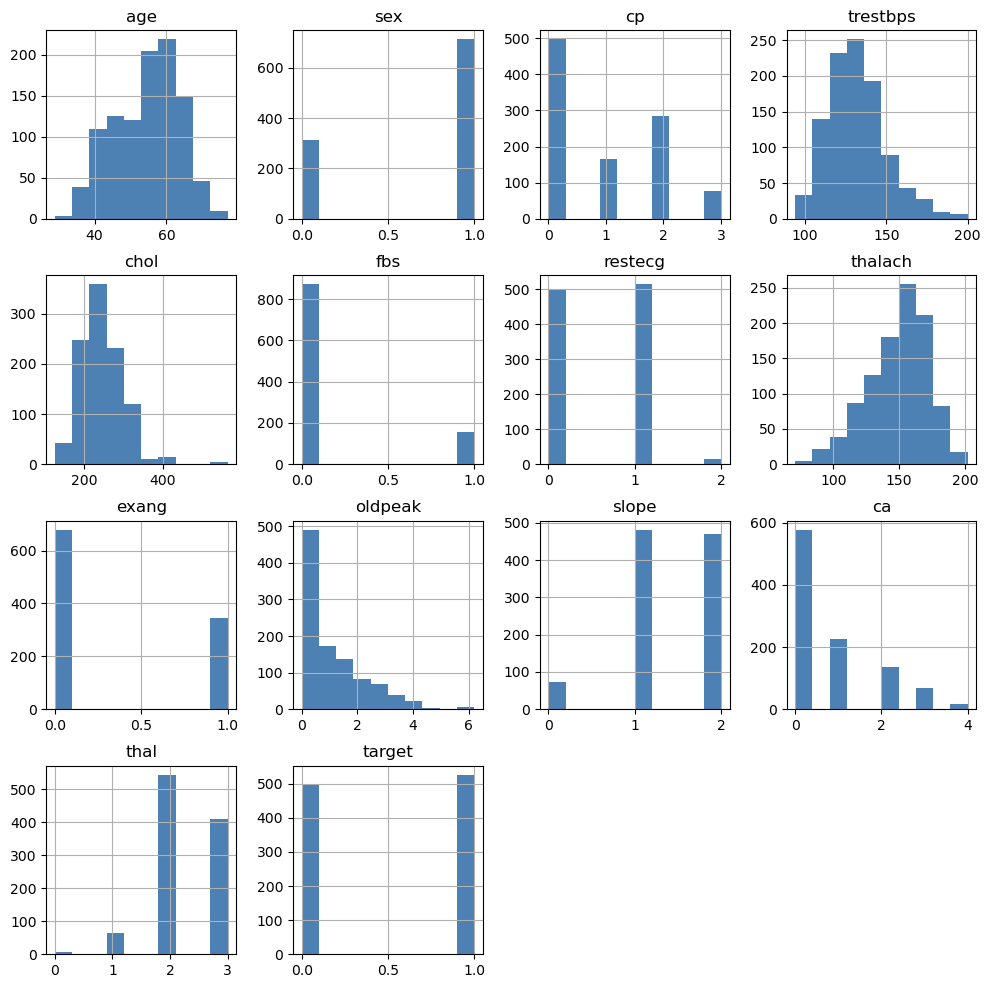

In [490]:
df.hist(figsize=(12,12), color = (.3, .5, .7))

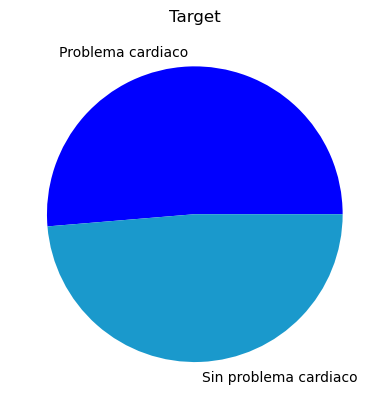

target
1    526
0    499
Name: count, dtype: int64


In [491]:
plt.figure()
plt.pie(df['target'].value_counts(), labels=["Problema cardiaco", "Sin problema cardiaco"], colors=['blue', (0.1, 0.6, 0.8)])
plt.title("Target")
plt.show()
print(df['target'].value_counts())

En este DataFrame, 526 personas poseen riesgo de un problema cardíaco.

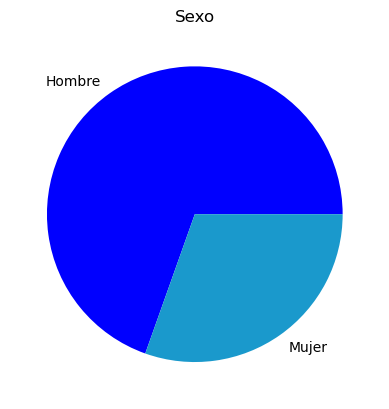

sex
1    713
0    312
Name: count, dtype: int64


In [492]:
plt.figure()
plt.pie(df['sex'].value_counts(), labels=["Hombre", "Mujer"], colors=['blue', (0.1, 0.6, 0.8)])
plt.title("Sexo")
plt.show()
print(df['sex'].value_counts())

En este DataFrame 713 personas son hombres y 312 mujeres.

### Gráficos comparativos

<function matplotlib.pyplot.show(close=None, block=None)>

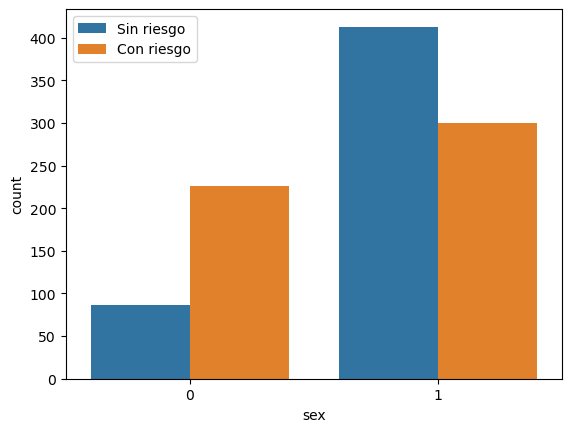

In [493]:
sns.countplot(x = 'sex', hue = df['target'].astype(str), data = df)
plt.legend(labels = ['Sin riesgo', 'Con riesgo'])
plt.show

En este DataFrame, existe una mayor cantidad de mujeres con riesgo de problemas cardiacos comparado a las que no.

Entre los pacientes que son hombres, es mayor la cantidad de pacientes  que no tienen riesgo de padecer un problema cardíaco de los que si.

<function matplotlib.pyplot.show(close=None, block=None)>

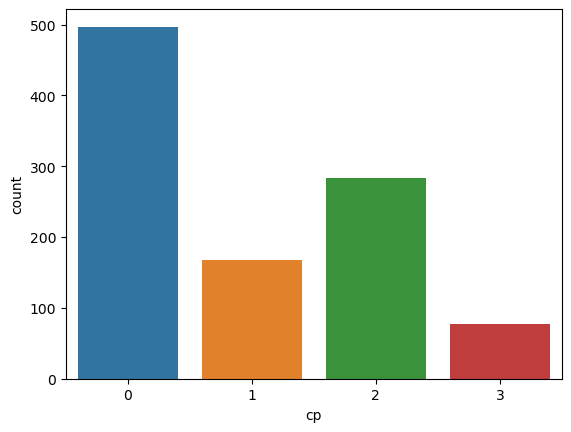

In [494]:
sns.countplot(x = df['cp'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

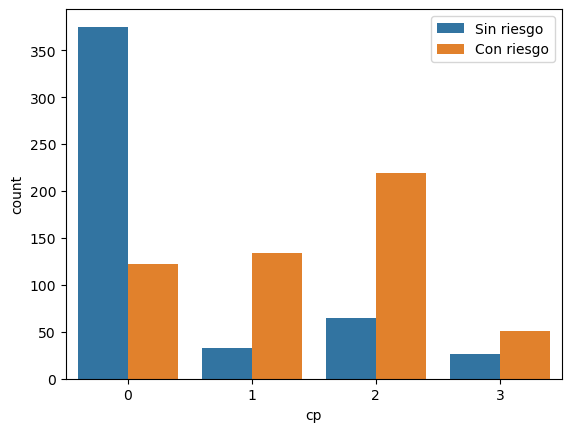

In [495]:
sns.countplot(x = df['cp'], hue = df['target'].astype(str))
plt.legend(labels = ['Sin riesgo', 'Con riesgo'])
plt.show

Se puede observar como las personas con angina típica son la mayoria pacientes sin riesgo, mientras que en personas sin dolor de angina, angina atípica y asintomáticos, se puede observar como los pacientes con riesgo son mayoría.

<function matplotlib.pyplot.show(close=None, block=None)>

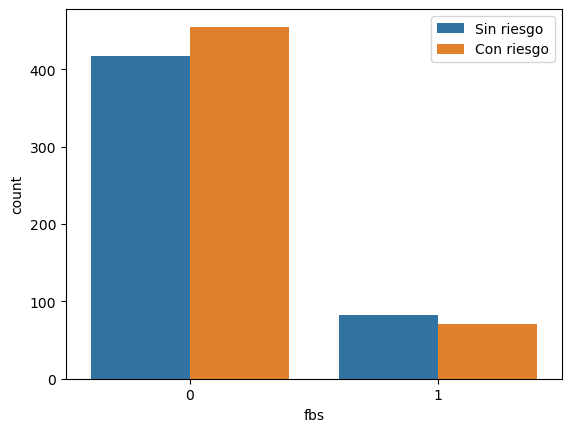

In [496]:
sns.countplot(x = df['fbs'], hue = df['target'].astype(str))
plt.legend(labels = ['Sin riesgo', 'Con riesgo'])
plt.show

En esta gráfica se puede observar que la mayoría de pacientes no sobrepasan los 120 mg/dl de azúcar en la sangre, sin embargo se puede observar como de los pacientes que tienen menos de 120 mg/dl azúcar en la sangre, existen más pacientes propensos a riesgo de un problema de corazón.

## Variables cuantitativas y cualitativas (EDA)

In [497]:
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']

df_numerico = df.loc[:, numericas].copy()

df_numerico

,age,trestbps,chol,thalach,oldpeak,slope,ca
0,52,125,212,168,1.0,2,2
1,53,140,203,155,3.1,0,0
2,70,145,174,125,2.6,0,0
3,61,148,203,161,0.0,2,1
4,62,138,294,106,1.9,1,3
...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,2,0
1021,60,125,258,141,2.8,1,1
1022,47,110,275,118,1.0,1,1
1023,50,110,254,159,0.0,2,0


<p style="text-align: justify;">
Se crea una caja de bigotes para resvisar valores atípicos de las variables 
</p>

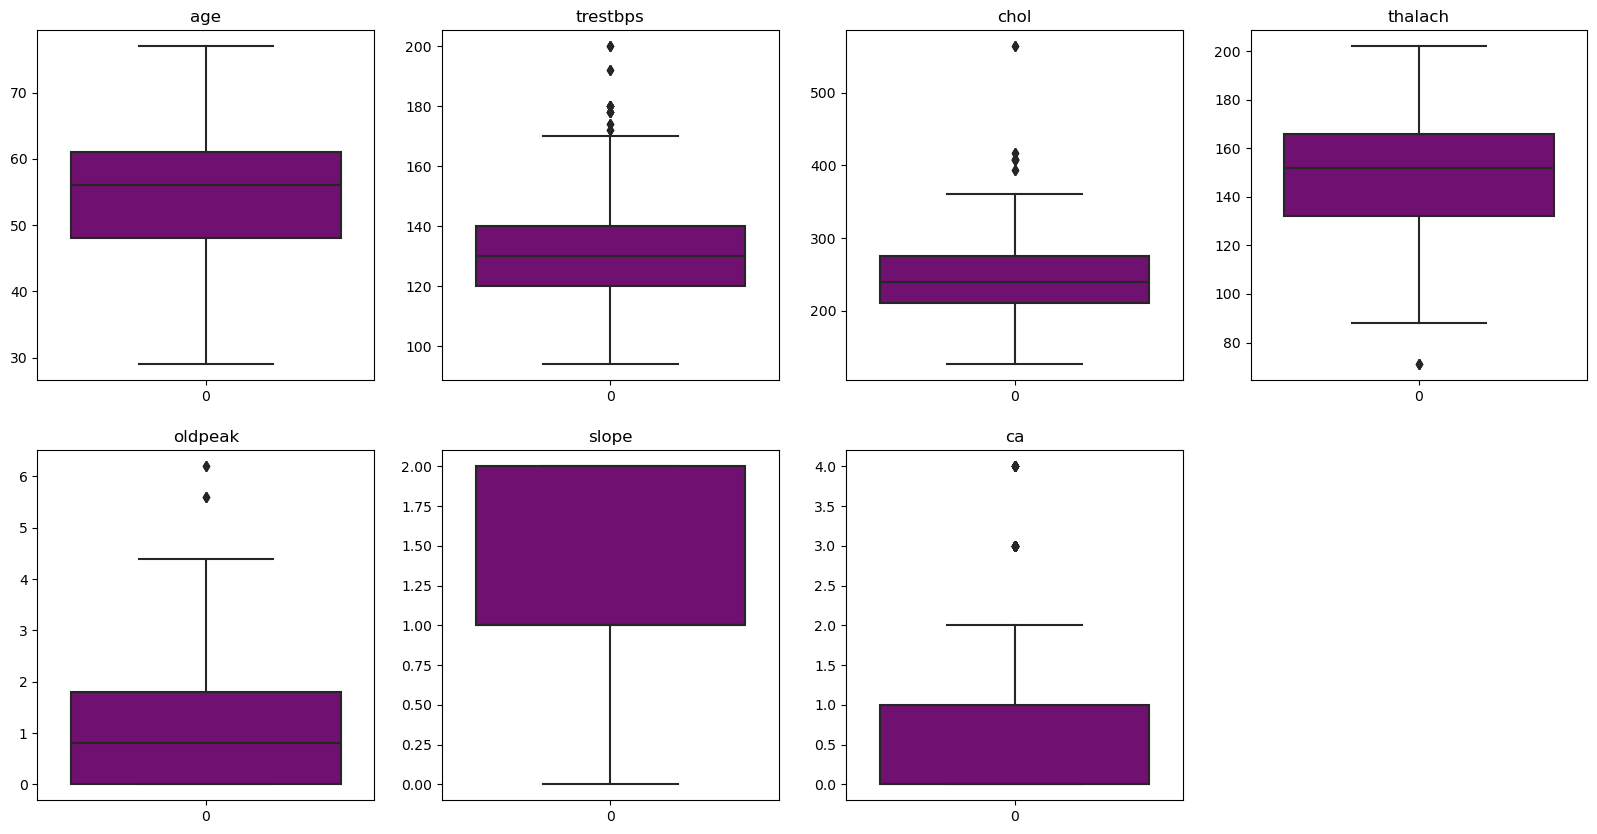

In [498]:
plt.figure(figsize=(20, 10))

for i in range(len(df_numerico.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(df_numerico[df_numerico.columns[i]], color = 'purple')
    plt.title(df_numerico.columns[i])

plt.show()

Se crea un mapa de calor para buscar correlación entre las variables

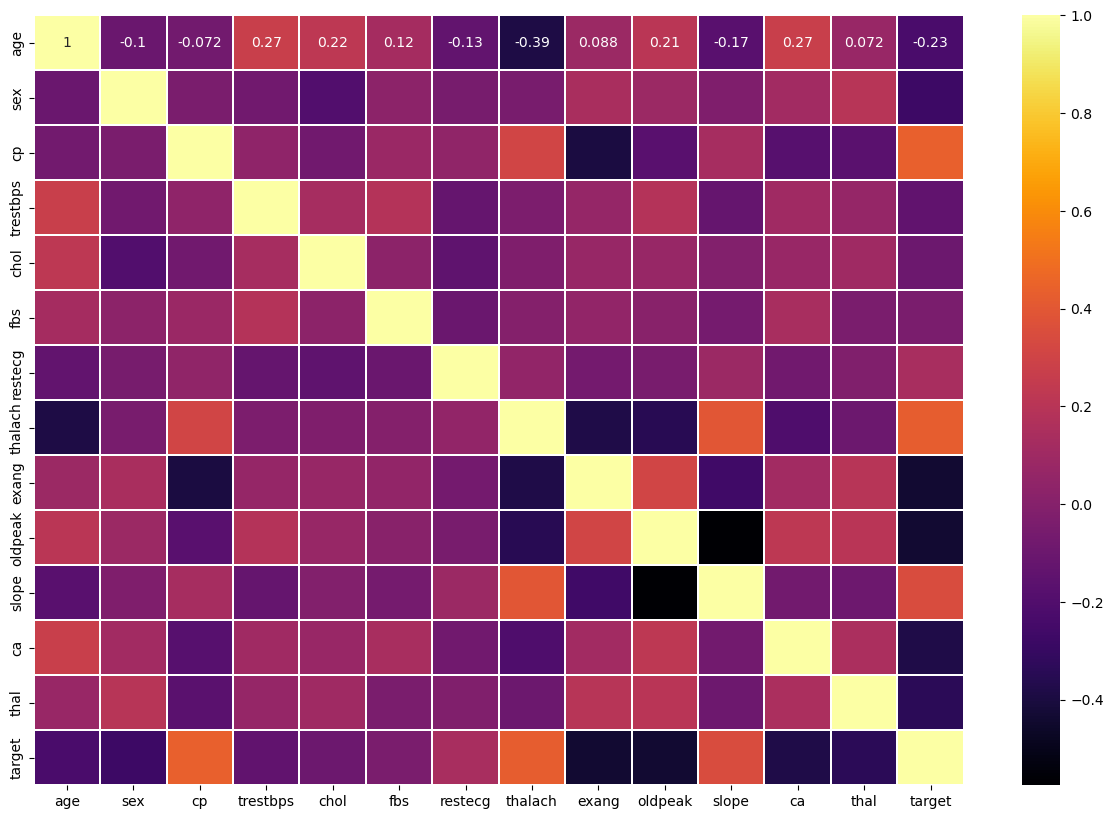

In [499]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), linewidth=.01, annot = True, cmap="inferno", xticklabels=True, yticklabels=True)
plt.show()

Se puede observar que existe una correlación entre thalach y slope  

### Primera correlación 

In [500]:
X1 = df['thalach'].to_numpy()
X1

array([168, 155, 125, ..., 118, 159, 113])

In [501]:
y1 = df['target'].to_numpy()
y1

array([0, 0, 0, ..., 0, 1, 0])

In [502]:
X2 = df['slope'].to_numpy()
X2

array([2, 0, 0, ..., 1, 2, 1])

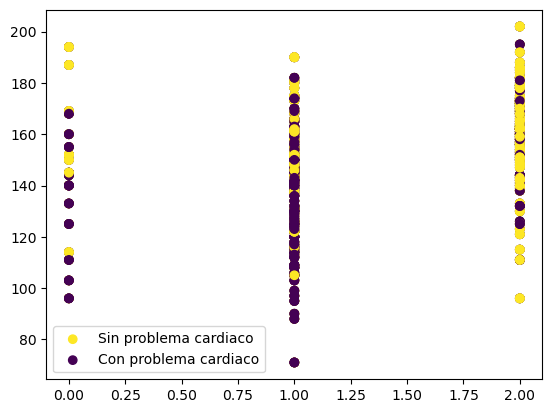

In [595]:
plt.scatter(X2, X1, c = y1 == 0, label = 'Sin problema cardiaco')
plt.scatter(X2, X1, c = y1 == 1, label = 'Con problema cardiaco')
plt.legend()

Se puede observar como los pacientes con pendiente descendiente son en su mayoría pacientes sin problema cardíaco, mientras que los que poseen una pendiente constante son más probables a poseer un problema cardíaco.

Se puede también observar que entre mayor frecuencia cardíaca máxima, es mayor la cantidad de pacientes sin problemas cardíacos, mientras que los que tienen menor frecuencia cardíaca, son más propensos a poseer un problema cardíaco.

# Procesamiento de datos

Utilizamos el método get dummies con las variables categóricas del DataFrame.

In [504]:
col_categ = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [505]:
df = pd.get_dummies(df, columns = col_categ, drop_first = True).astype(int)
df

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,60,1,125,258,141,2,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,47,1,110,275,118,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,50,0,110,254,159,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Ahora con las variables númericas utilizamos el método de Standard Scaler para normalizar los datos.

In [506]:
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [507]:
SS = StandardScaler()

df[col_num] = SS.fit_transform(df[col_num])
df

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0.821321,0.187950,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.158157,1,0.479107,-0.833861,0.255968,2.031475,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.716595,1,0.764688,-1.396233,-1.048692,1.109712,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.724079,1,0.936037,-0.833861,0.516900,-0.733813,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.834359,0,0.364875,0.930822,-1.874977,0.187950,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.479107,-0.484803,0.647366,-0.733813,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,0.613800,1,-0.377636,0.232705,-0.352873,1.109712,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,-0.819834,1,-1.234378,0.562371,-1.353113,0.187950,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,-0.488996,0,-1.234378,0.155137,0.429923,-0.733813,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Ahora con los datos normalizados, asignamos el valor de 'X' y 'y', (los features y el target).

In [508]:
X = df.drop('target', axis = 1)
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0.821321,0.187950,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.158157,1,0.479107,-0.833861,0.255968,2.031475,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.716595,1,0.764688,-1.396233,-1.048692,1.109712,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.724079,1,0.936037,-0.833861,0.516900,-0.733813,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.834359,0,0.364875,0.930822,-1.874977,0.187950,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.479107,-0.484803,0.647366,-0.733813,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,0.613800,1,-0.377636,0.232705,-0.352873,1.109712,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,-0.819834,1,-1.234378,0.562371,-1.353113,0.187950,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,-0.488996,0,-1.234378,0.155137,0.429923,-0.733813,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [509]:
y = df['target']
y 

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

### Modelo

In [510]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 32)

In [511]:
X_test.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
246,-0.047877,1,3.449149,0.717508,1.995514,-0.733813,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
747,0.613800,1,-0.834565,-0.310274,0.473411,0.187950,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
680,-1.371232,1,-0.663216,0.950214,0.560389,-0.733813,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
610,-1.260953,0,0.022178,1.842251,-0.570317,2.031475,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
871,-1.702071,1,0.479107,1.454409,1.430162,-0.733813,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [512]:
y_test.head()

246    0
747    0
680    1
610    0
871    1
Name: target, dtype: int64

Utilizamos el método de Regresión Linear para probar nuestro modelo de predicción 

In [524]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [525]:
score1 = lr.score(X_test, y_test)
score1

0.527020718017648

Utilizamos el método de KN para probar nuestro modelo de predicción 

In [519]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [522]:
score2 = clf.score(X_test, y_test)
score2

0.824390243902439

Utilizamos el método de Regresión Logística para probar nuestro modelo de predicción 

In [513]:
modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

LogisticRegression()

In [514]:
score3 = modelo_log.score(X_test, y_test)
score3

0.8609756097560975

## Clusters

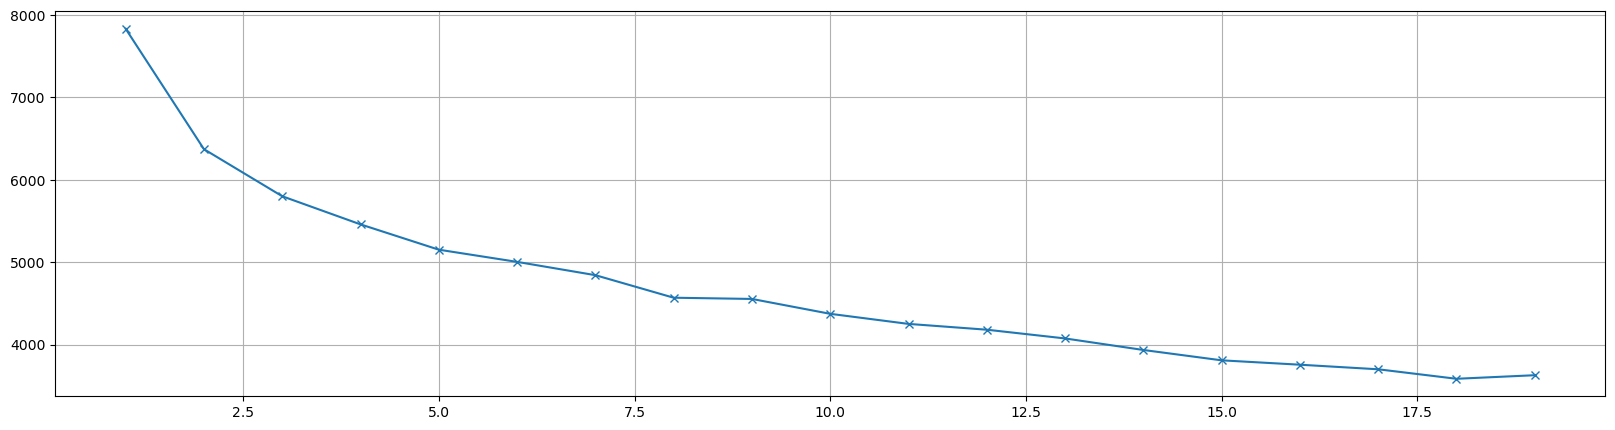

In [551]:
lista = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 32)
    kmeans.fit(X)
    lista.append(kmeans.inertia_)

plt.figure(figsize=(20, 5))
plt.plot(range(1,20), lista, marker = "x")
plt.grid()

In [552]:
kmeans = KMeans(n_clusters = 8, random_state = 32)
clusters = kmeans.fit_predict(df)

df1 = df.copy()
df1["cluster"] = clusters

In [553]:
df1['cluster']

0       0
1       2
2       2
3       0
4       3
       ..
1020    0
1021    7
1022    7
1023    5
1024    7
Name: cluster, Length: 1025, dtype: int32

## Visualización TSNEA

In [556]:
centroides = kmeans.cluster_centers_
centroides[1]

array([ 6.09005121e-01,  4.67391304e-01, -9.21480963e-01, -6.65655606e-01,
       -7.37653499e-01, -4.43257351e-01,  7.71739130e-01,  9.78260870e-02,
        3.91304348e-01,  6.52173913e-02,  1.41304348e-01,  4.02173913e-01,
        3.26086957e-02,  3.26086957e-01,  5.00000000e-01,  4.67391304e-01,
        1.95652174e-01,  9.78260870e-02,  4.34782609e-02, -6.93889390e-18,
        3.26086957e-02,  8.69565217e-01,  6.52173913e-02])

In [588]:
df2 = TSNE(n_components = 2, random_state = 35, perplexity = 8)
tsne_df = df2.fit_transform(df1)
tsne_df

array([[  94.877495, -183.53653 ],
       [  93.35321 ,  183.93309 ],
       [ 110.108086,  105.02349 ],
       ...,
       [ -82.775055,  143.29382 ],
       [-114.55047 ,  -85.23398 ],
       [-112.87895 ,  106.214455]], dtype=float32)

In [584]:
df3 = TSNE(n_components = 2, random_state = 42, perplexity = 6)
df_centroides = df3.fit_transform(centroides)
df_centroides

array([[ -17.744616 ,  -74.47604  ],
       [  63.180862 ,  -66.065544 ],
       [ 104.52975  ,  107.65926  ],
       [  82.66537  ,   29.001862 ],
       [  -7.024551 ,   -2.7134497],
       [ -79.37349  , -115.66376  ],
       [ -86.28135  ,  -15.266004 ],
       [  18.408127 ,   79.414604 ]], dtype=float32)

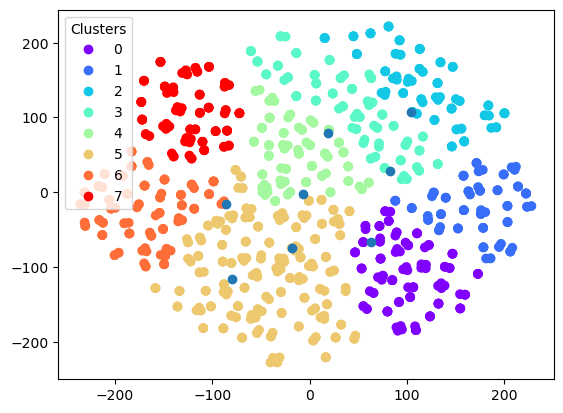

In [591]:
scatter = plt.scatter(tsne_df[:, 0], tsne_df[:, 1], c = df1["cluster"], cmap = "rainbow", label = "Clusters")
plt.scatter(df_centroides[:,0], df_centroides[:,1])
plt.legend(*scatter.legend_elements(), title = "Clusters")
plt.show()

En conclusión, la creación de este proyecto ha demostrado la utilidad de técnicas de análisis de datos y modelado predictivo para abordar problemas de salud, en particular, la prevención de enfermedades cardíacas. Se ha logrado desarrollar un modelo predictivo capaz de identificar a las personas con mayor riesgo de padecer problemas cardíacos, lo que puede ser una herramienta valiosa para los profesionales de la salud y las personas preocupadas por su bienestar cardiovascular.

El análisis exploratorio de reveló interesantes relaciones entre las variables y la presencia de enfermedades cardíacas, destacando la importancia de factores como la presión arterial, los niveles de colesterol y la edad en la predicción del riesgo cardiovascular.

En última instancia, este proyecto es una pequeña probada de la capacidad de la ciencia de datos para generar conocimientos significativos y aplicables en el campo de la salud y de cualquier otro, con el potencial de mejorar la calidad de vida y reducir la carga de enfermedades cardiovasculares en la sociedad.
